<h1 style = "background:lightblue;border:0"> Introduction </h1>

<p style = "font-size: 16px;text-indent:15px;">Fifa is one of the most played console games in the world. Fifa 21 is a series of this. Fifa 21 is a soccer game.FIFA 21 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 28th installment in the FIFA series, and was released on 9 October 2020 for Microsoft Windows, Nintendo Switch, PlayStation 4 and Xbox One. Enhanced versions for the PlayStation 5 and Xbox Series X and Series S were released on 3 December 2020, in addition to a version for Stadia. I performed Exploratory Data Analysis using the Fifa 21 data set. Later, I made visualizations using matplotlib & seaborn libraries.</p>

<h2 style = "background:lightblue;border:0"> Content : </h2>

1. [Importing our libraries for EDA](#0)
1. [Load And Check Data](#1)
1. [Variable Description](#2)
    * [Check for Missing Value In Dataset](#3)
        * [Rename Columns](#4)
        * [Covert Datetime(D.O.B) Column to Numerical Data](#5)
1. [Subtract 2021 from Date Of Birth to get Age](#6)
1. [Dropping columns in our Dataset with Pandas](#7)
1. [Checking for the Shape of Dataset in Rows and Columns](#8)
    * [Data types in our dataset](#9)
    * [Statistical Analysis of our Dataset](#10)
1. [Unique Features in Each Column](#11)
    * [Fastest Players for FIFA 2021](#12)
    * [Tallest Players in FIFA 2021](#13)
    * [Best Defender in FIFA 2021](#14)
    * [Strongest Players in FIFA 2021](#15)
    * [Best Player's with LongPasses in FIFA 2021](#16)
    * [Best Player's with ShortPasses in FIFA 2021](#17)
    * [Most Paid Players](#18)
    * [Best GoalKeeper by Reflex](#19)
    * [Correlation](#20)
    * [Pair Plot](#21)
    * [WordCloud Of Nationality](#22)
    * [Who are the Top Players in FIFA 2021?](#23)
    * [Which foot does the footballers in fifa 21 use more?](#24)
    * [Top 3 Footballers with the Highest Wage & Nationality of this footballers](#25)
    * [Age Distribution of FIFA players](#27)
    * [Skill move Distribution](#28)
    * [Top 10 countries with the most footballers](#29)
    
    





<a id ='0' ></a>
<h1 style = "background:lightblue;border:0"> Importing our libraries for EDA </h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #visualize
plt.style.use("seaborn-whitegrid")

import seaborn as sns #visualize

from collections import Counter

import warnings # don't show warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
%matplotlib inline

<a id ='1' ></a>
<h1 style = "background:lightblue;border:0"> Load and Check Data </h1>

In [2]:
#Reading Our Dataset with Pandas Library
data_fifa = pd.read_csv("players.csv")
data_fifa.sample(3)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
6274,6275,Sean Davis,"CM, CDM, CAM",2/8/1993,183,75,69,70,CM,70,...,1,Medium/ Medium,Normal (170-185),69,70,73,69,73,NaN,['Team Player']
118,119,Marcel Sabitzer,"CM, CDM, CAM",3/17/1994,178,76,84,86,CM,84,...,3,High/ High,Normal (170-185),79,75,78,81,82,['Distance Shooter'],"['Injury Prone', 'Long Shot Taker (AI)', 'Outs..."
10349,10350,Matteo Gabbia,CB,10/21/1999,185,78,65,80,CB,67,...,1,Low/ High,Lean (185+),47,41,28,37,52,NaN,NaN


In [3]:
#Viweing the columns available in our Dataset
data_fifa.columns

Index(['int_player_id', 'str_player_name', 'str_positions', 'dt_date_of_birth',
       'int_height', 'int_weight', 'int_overall_rating',
       'int_potential_rating', 'str_best_position', 'int_best_overall_rating',
       'int_value', 'int_wage', 'int_team_id', 'str_nationality',
       'int_crossing', 'int_finishing', 'int_heading_accuracy',
       'int_short_passing', 'int_volleys', 'int_defensive_awareness',
       'int_standing_tackle', 'int_sliding_tackle', 'int_diving',
       'int_handling', 'int_kicking', 'int_gk_positioning', 'int_reflexes',
       'int_aggression', 'int_interceptions', 'int_positioning', 'int_vision',
       'int_penalties', 'int_composure', 'int_acceleration',
       'int_sprint_speed', 'int_agility', 'int_reactions', 'int_balance',
       'int_shot_power', 'int_jumping', 'int_stamina', 'int_strength',
       'int_long_shots', 'str_preferred_foot', 'int_weak_foot',
       'int_skill_moves', 'int_international_reputations', 'str_work_rate',
       'str_body_

<a id ='2' ></a>
<h1 style = "background:lightblue;border:0">Variable Description</h1>

1. **ID** : unique id number to each footballer
2. **Name** : name of footballer
3. **Age** : age of footballer
4. **Photo** : photo of footballer
5. **Nationality** : the nationality of the player
6. **Overall** : in-game power
7. **Potential** : the potential of the football player
8. **Clup**: football player's club
9. **Value** : value of the player
10. **Wage** : wages paid by the player
11. **Special** : special
12. **Preferred Foot** : foot used by the footballer(left,Right)
13. **International Reputation** : the international reputation of the football player
14. **Weak Foot** : weak foot of the footballer
15. **Skill Moves** : football player's skills moves
16. **Work Rate** : football player's work rate
17. **Body Type** : body type of the football player
18. **Real Face** : real face of the player(false,true)
19. **Position** : position played by the football player
20. **Jersey Number** : jersey number of the football player
21. **Joined** : Joined
22. **Loaned From** : is the football player for loaned from
23. **Contract Valid Until** : the expiry date of the player contract
24. **Height** : footballer's height
25. **Weight** : footballer's weight
26. **Crossing** : long cross pass by the footballer
27. **Finishing** : football player finishing
28. **HeadingAccuracy** : HeadingAccuracy
29. **ShortPassing** : ShortPassing
30. **Dribbling** : player's dribbling speed
31. **Curve** : spin on the ball
32. **LongPassing** : football player's long pass
33. **BallControl** : football player control the ball
34. **Acceleration** : the speed of the football player
35. **SprintSpeed** : the sprintSpeed of the player
36. **Agility** : the agility of the football player
37. **Reactions** : the reaction of the footballer
38. **Balance** : football player's balance
39. **ShotPower** : football player's shotpower
40. **Jumping** : the footballer's jumping capacity
41. **Stamina** : the footballer's stamina
42. **Strength** : the strength of the football player
43. **LongShots** : footballer's longest shot
44. **Aggression** : football player's aggression
45. **Positioning** : the position of the football player in the football field
46. **Vision** : football player vision
47. **Penalties** : footballer's penalties
48. **Composure** : the calmness of the football player on the field
49. **Marking** : marking
50. **StandingTackle** : the fight of the football player
51. **SlidingTackle** : slide intervention
52. **GKDiving** : diving
53. **GKHandling** : handling
54. **GKKicking** : kicking
55. **GKPositioning** : Positioning
56. **GKReflexes** : reflexes
57. **Release Clause** : the player's release clause

    **Football Player Position** : LS, ST, RS, LW, LF, CF, RF, RW, LAM, 
    CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, BC, RCB, RB. 







<a id ='3' ></a>
<h1 style = "background:lightblue;border:0"> Check for Missing Value In Dataset </h1>

In [4]:
#Checking for columns with missing values
data_fifa.columns[data_fifa.isnull().any()] 

Index(['int_team_id', 'str_player_speciality', 'str_trait'], dtype='object')

<a id ='4' ></a>
<h1 style = "background:lightblue;border:0"> Rename Columns </h1>

In [5]:
# Renaming the Columns in Dataset in a suitable Pythonic way
data_fifa = data_fifa.rename(columns = {'str_player_name': 'PlayerName', 'str_positions': 'Positions',
                                       'dt_date_of_birth': 'D.O.B', 'int_height': 'PlayerHeight',
                                       'int_weight': 'PlayerWeight', 'int_overall_rating': 'OverallRating',
                                       'int_potential_rating': 'PotentialRating', 'str_best_position': 'BestPositions',
                                       'int_best_overall_rating': 'BestOverallRating', 'int_value': 'PlayerValue',
                                       'int_wage': 'Wage', 'str_nationality': 'Nationality',
                                       'int_crossing': 'Crossing', 'int_finishing': 'FinishingAccuracy',
                                       'int_heading_accuracy': 'HeadingAccuracy', 'int_short_passing': 'ShortPassing',
                                       'int_volleys': 'Volleys', 'int_defensive_awareness': 'DefensiveAwareness',
                                       'int_standing_tackle': 'StandingTackle', 'int_sliding_tackle': 'SlidingTackle',
                                       'int_diving': 'Diving', 'int_handling': 'Handling',
                                       'int_kicking': 'Kicking', 'int_gk_positioning': 'GkPositioning',
                                       'int_reflexes': 'Reflexes', 'int_aggression': 'Aggression',
                                       'int_interceptions': 'Interceptions', 'int_positioning': 'Positioning',
                                       'int_vision': 'Vision', 'int_penalties': 'Penalties',
                                       'int_composure': 'Composure', 'int_acceleration': 'Acceleration',
                                       'int_sprint_speed': 'SprintSpeed', 'int_agility': 'Agility',
                                       'int_reactions': 'Reactions', 'int_balance': 'Balance',
                                       'int_shot_power': 'ShotPower', 'int_jumping': 'JumpingPower',
                                       'int_stamina': 'Stamina', 'int_strength': 'Strength',
                                       'int_long_shots': 'LongShots', 'str_preferred_foot': 'PreferredFoot',
                                        'int_weak_foot': 'WeakFoot', 'int_skill_moves': 'SkillMoves',
                                       'int_international_reputations': 'InternationalReputations', 'str_work_rate': 'WorkRate',
                                       'str_body_type': 'BodyType', 'int_dribbling': 'Dribbling',
                                       'int_curve': 'Curve', 'int_fk_accuracy': 'FreekickAccuracy',
                                       'int_long_passing': 'LongPassing', 'int_ball_control': 'BallControl'}, inplace = False)

<a id ='5' ></a>
<h1 style = "background:lightblue;border:0"> Covert Datetime(D.O.B) Column to Numerical Data  </h1>


In [6]:
#Converting Our Datatime column to Numerical Column @year e.g 1996 and @Month e.g 11th month
data_fifa['D.O.B'] = pd.to_datetime(data_fifa['D.O.B'])
data_fifa['year']= data_fifa['D.O.B'].dt.year
data_fifa['month']= data_fifa['D.O.B'].dt.month



<a id ='6' ></a>
<h1 style = "background:lightblue;border:0"> Subtract 2021 from Date Of Birth to get Age</h1>

In [7]:
#Subtract 2021 from Date Of Birth to get Age
today = pd.to_datetime('2021-03-10')
data_fifa['age'] = today.year - data_fifa['D.O.B'].dt.year


<a id ='7' ></a>
<h1 style = "background:lightblue;border:0"> Dropping columns in our Dataset with Pandas</h1>

In [8]:
#Dropping columns in our Dataset with Pandas
columns = ['int_team_id', 'str_player_speciality', 'str_trait','int_player_id','D.O.B','year','Positions','OverallRating']
data_fifa = data_fifa.drop(columns, axis=1, inplace=False )
data_fifa.sample(4).T

,4296,18575,17945,16676
PlayerName,Clifford Aboagye,Aleksander B. Stenseth,Benjamin Mbunga-Kimpioka,Jordan Slew
PlayerHeight,165,186,183,191
PlayerWeight,55,77,67,81
PotentialRating,76,61,65,58
BestPositions,CAM,ST,RM,ST
BestOverallRating,74,53,55,58
PlayerValue,2700000,170000,240000,220000
Wage,13000,600,2000,2000
Nationality,Ghana,Norway,Sweden,England
Crossing,66,47,52,53



<a id ='8' ></a>
<h1 style = "background:lightblue;border:0"> Checking for the Shape of Dataset in Rows and Columns</h1>

In [9]:
#Checking for the Shape of Dataset in Rows and Columns
data_fifa.shape

(19002, 51)


<a id ='9' ></a>
<h1 style = "background:lightblue;border:0"> Data types in our dataset</h1>

In [10]:
#Checking for the number of Categorical and Numerical Data
data_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PlayerName                19002 non-null  object
 1   PlayerHeight              19002 non-null  int64 
 2   PlayerWeight              19002 non-null  int64 
 3   PotentialRating           19002 non-null  int64 
 4   BestPositions             19002 non-null  object
 5   BestOverallRating         19002 non-null  int64 
 6   PlayerValue               19002 non-null  int64 
 7   Wage                      19002 non-null  int64 
 8   Nationality               19002 non-null  object
 9   Crossing                  19002 non-null  int64 
 10  FinishingAccuracy         19002 non-null  int64 
 11  HeadingAccuracy           19002 non-null  int64 
 12  ShortPassing              19002 non-null  int64 
 13  Volleys                   19002 non-null  int64 
 14  DefensiveAwareness    


<a id ='10' ></a>
<h1 style = "background:lightblue;border:0">Statistical Analysis of our Dataset</h1>

In [17]:
#Giving A Statistical Analysis of our Dataset
data_fifa.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PlayerHeight,PlayerWeight,PotentialRating,BestOverallRating,PlayerValue,Wage,Crossing,FinishingAccuracy,HeadingAccuracy,ShortPassing,...,WeakFoot,SkillMoves,InternationalReputations,Dribbling,Curve,FreekickAccuracy,LongPassing,BallControl,month,age
count,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,...,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000
mean,181.225660,75.046311,71.148932,66.784286,2891449.005368,9113.167035,49.690454,45.877329,51.970056,58.808494,...,2.942217,2.365540,1.090569,55.607462,47.271603,42.394432,52.779971,58.552416,5.836123,26.592464
std,6.847472,7.078378,6.115352,6.733926,7733189.305884,19735.324238,18.141514,19.580879,17.323647,14.517060,...,0.669568,0.766687,0.359019,18.786894,18.217325,17.240399,15.172601,16.580120,3.446935,4.715048
min,155.000000,50.000000,48.000000,48.000000,0.000000,0.000000,6.000000,3.000000,5.000000,7.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,18.000000
25%,176.000000,70.000000,67.000000,62.000000,475000.000000,1000.000000,38.000000,30.000000,44.000000,54.000000,...,3.000000,2.000000,1.000000,49.000000,35.000000,31.000000,43.000000,54.000000,3.000000,23.000000
50%,181.000000,75.000000,71.000000,67.000000,950000.000000,3000.000000,54.000000,50.000000,55.000000,62.000000,...,3.000000,2.000000,1.000000,61.000000,49.000000,41.000000,56.000000,63.000000,5.000000,26.000000
75%,186.000000,80.000000,75.000000,71.000000,2000000.000000,8000.000000,63.000000,62.000000,64.000000,68.000000,...,3.000000,3.000000,1.000000,68.000000,61.000000,55.000000,64.000000,69.000000,9.000000,30.000000
max,206.000000,110.000000,95.000000,93.000000,185500000.000000,560000.000000,94.000000,95.000000,93.000000,94.000000,...,5.000000,5.000000,5.000000,96.000000,94.000000,94.000000,93.000000,96.000000,12.000000,54.000000


<a id ='11' ></a>
<h1 style = "background:lightblue;border:0">Unique Features in Each Column</h1>

In [18]:
#Checking for the Number Unique Features in Each Column.
data_fifa.nunique()

PlayerName                  18914
PlayerHeight                   50
PlayerWeight                   56
PotentialRating                46
BestPositions                  15
BestOverallRating              46
PlayerValue                   256
Wage                          133
Nationality                   165
Crossing                       89
FinishingAccuracy              93
HeadingAccuracy                89
ShortPassing                   86
Volleys                        88
DefensiveAwareness             92
StandingTackle                 87
SlidingTackle                  85
Diving                         69
Handling                       70
Kicking                        79
GkPositioning                  75
Reflexes                       70
Aggression                     88
Interceptions                  89
Positioning                    94
Vision                         86
Penalties                      87
Composure                      85
Acceleration                   85
SprintSpeed   

<a id ='12' ></a>
<h1 style = "background:lightblue;border:0">Fastest Players for FIFA 2021</h1>

In [49]:
player_name = data_fifa[["Acceleration","PlayerName","BestPositions",'age','Nationality','SprintSpeed']].nlargest(7, ['Acceleration']).set_index('PlayerName')
player_name

,Acceleration,BestPositions,age,Nationality,SprintSpeed
PlayerName,,,,,
Adama Traoré Diarra,97,RM,25,Spain,96
Kylian Mbappé Lottin,96,ST,23,France,96
Raheem Shaquille Sterling,96,LW,27,England,90
Moussa Diaby,96,LM,22,France,90
Alphonso Davies,96,LB,21,Canada,96
Daniel James,96,RM,24,Wales,95
Jérémy Doku,96,RW,19,Belgium,91


<a id ='13' ></a>
<h1 style = "background:lightblue;border:0">Tallest Players in FIFA 2021</h1>

In [28]:

player_name = data_fifa[["PlayerHeight","PlayerName","PlayerWeight","BestPositions",'age','Nationality']].nlargest(10, ['PlayerHeight']).set_index('PlayerName')
player_name

,PlayerHeight,PlayerWeight,BestPositions,age,Nationality
PlayerName,,,,,
Tomáš Holý,206,102,GK,30,Czech Republic
Costel Fane Pantilimon,203,96,GK,34,Romania
Abdoul Bocar Bâ,203,94,CB,27,Mauritania
Aaron James Chapman,203,92,GK,31,England
Vanja Milinković-Savić,202,92,GK,24,Serbia
Kjell Scherpen,202,85,GK,21,Netherlands
Stefan Maierhofer,202,98,ST,39,Austria
Demba Thiam Ngagne,202,87,GK,23,Senegal
Lovre Kalinić,201,99,GK,31,Croatia


<a id ='14' ></a>
<h1 style = "background:lightblue;border:0">Best Defender in FIFA 2021</h1>

In [20]:

player_name = data_fifa[["DefensiveAwareness","PlayerName","BestPositions",'age','Nationality']].nlargest(10, ['DefensiveAwareness']).set_index('PlayerName')
player_name

,DefensiveAwareness,BestPositions,age,Nationality
PlayerName,,,,
Giorgio Chiellini,94,CB,37,Italy
Virgil van Dijk,93,CB,30,Netherlands
Milan Škriniar,92,CB,26,Slovakia
Kalidou Koulibaly,91,CB,30,Senegal
Mats Hummels,90,CB,33,Germany
Clément Nicolas Laurent Lenglet,90,CB,26,France
Leonardo Bonucci,90,CB,34,Italy
Diego Roberto Godín Leal,90,CB,35,Uruguay
N'Golo Kanté,89,CDM,30,France


<a id ='15' ></a>
<h1 style = "background:lightblue;border:0">Strongest Players in FIFA 2021</h1>

In [42]:
player_name = data_fifa[["Strength","PlayerName","PlayerHeight","Stamina",'age','Nationality','PlayerWeight','BestPositions']].nlargest(7, ['Strength']).set_index('PlayerName')
player_name

,Strength,PlayerHeight,Stamina,age,Nationality,PlayerWeight,BestPositions
PlayerName,,,,,,,
Adebayo Akinfenwa,97,178,65,39,England,110,ST
Daryl Dike,96,188,59,21,United States,100,ST
Romelu Lukaku Menama,95,191,73,28,Belgium,94,ST
Armando Jesús Méndez Alcorta,95,176,79,25,Uruguay,82,RB
Aleksandar Vukotić,95,201,61,26,Serbia,95,CB
Joyskim Aurélien Dawa Tchakonte,95,194,66,25,Cameroon,95,CB
Kalidou Koulibaly,94,187,70,30,Senegal,89,CB


<a id ='16' ></a>
<h1 style = "background:lightblue;border:0">Best Player's with LongPasses in FIFA 2021</h1>

In [46]:

player_name = data_fifa[["LongPassing","PlayerName","ShortPassing","Stamina",'age','Nationality','PlayerWeight','BestPositions']].nlargest(10, ['LongPassing']).set_index('PlayerName')
player_name

,LongPassing,ShortPassing,Stamina,age,Nationality,PlayerWeight,BestPositions
PlayerName,,,,,,,
Kevin De Bruyne,93,94,89,30,Belgium,70,CAM
Toni Kroos,93,93,75,31,Germany,76,CM
Lionel Andrés Messi Cuccittini,91,91,72,34,Argentina,72,RW
Paul Pogba,91,86,83,28,France,84,CM
Daniel Parejo Muñoz,90,92,78,32,Spain,74,CM
Trent Alexander-Arnold,89,85,88,23,England,69,RB
Luka Modrić,89,91,83,36,Croatia,66,CM
Marco Verratti,89,90,76,29,Italy,60,CM
Hakim Ziyech,89,86,80,28,Morocco,65,CAM


<a id ='17' ></a>
<h1 style = "background:lightblue;border:0">Best Player's with ShortPasses in FIFA 2021</h1>

In [50]:

player_name = data_fifa[["ShortPassing","PlayerName","LongPassing","Stamina",'age','Nationality','PlayerWeight','BestPositions']].nlargest(10, ['ShortPassing']).set_index('PlayerName')
player_name

,ShortPassing,LongPassing,Stamina,age,Nationality,PlayerWeight,BestPositions
PlayerName,,,,,,,
Kevin De Bruyne,94,93,89,30,Belgium,70,CAM
Toni Kroos,93,93,75,31,Germany,76,CM
David Josué Jiménez Silva,92,84,70,35,Spain,67,CAM
Daniel Parejo Muñoz,92,90,78,32,Spain,74,CM
Lionel Andrés Messi Cuccittini,91,91,72,34,Argentina,72,RW
Luka Modrić,91,89,83,36,Croatia,66,CM
Marco Verratti,90,89,76,29,Italy,60,CM
Frenkie de Jong,90,86,90,24,Netherlands,74,CM
Luis Alberto Romero Alconchel,90,89,75,29,Spain,74,CAM


<a id ='18' ></a>
<h1 style = "background:lightblue;border:0">Most Paid Players</h1>

In [57]:

player_name = data_fifa[["Wage","PlayerName","PlayerValue","BestOverallRating",'age','Nationality','PotentialRating','InternationalReputations']].nlargest(10, ['Wage']).set_index('PlayerName')
player_name

,Wage,PlayerValue,BestOverallRating,age,Nationality,PotentialRating,InternationalReputations
PlayerName,,,,,,,
Lionel Andrés Messi Cuccittini,560000,103500000,93,34,Argentina,93,5
Kevin De Bruyne,370000,129000000,91,30,Belgium,91,4
Karim Benzema,350000,83500000,89,34,France,89,4
Eden Hazard,350000,89500000,88,30,Belgium,88,4
Carlos Henrique Venancio Casimiro,310000,90500000,89,29,Brazil,89,3
Toni Kroos,310000,87500000,88,31,Germany,88,4
Sergio Ramos García,300000,33500000,89,35,Spain,89,4
Sergio Leonel Agüero del Castillo,300000,83500000,89,33,Argentina,89,4
Antoine Griezmann,290000,79500000,87,30,France,87,4


<a id ='19' ></a>
<h1 style = "background:lightblue;border:0">Best GoalKeeper by Reflex</h1>

In [21]:

player_name = data_fifa[["Reflexes","PlayerName",'age','Nationality','Kicking','Handling']].nlargest(10, ['Reflexes']).set_index('PlayerName')
player_name

,Reflexes,age,Nationality,Kicking,Handling
PlayerName,,,,,
Jan Oblak,90,28,Slovenia,78,92
Marc-André ter Stegen,90,29,Germany,88,85
Keylor Navas Gamboa,90,35,Costa Rica,75,81
Hugo Lloris,90,35,France,68,82
Alisson Ramsés Becker,89,29,Brazil,85,88
Manuel Neuer,89,35,Germany,91,87
Samir Handanovič,89,37,Slovenia,73,85
David De Gea Quintana,89,31,Spain,78,81
Gianluigi Donnarumma,89,22,Italy,76,81


<a id ='20' ></a>
<h1 style = "background:lightblue;border:0">Correlation</h1>

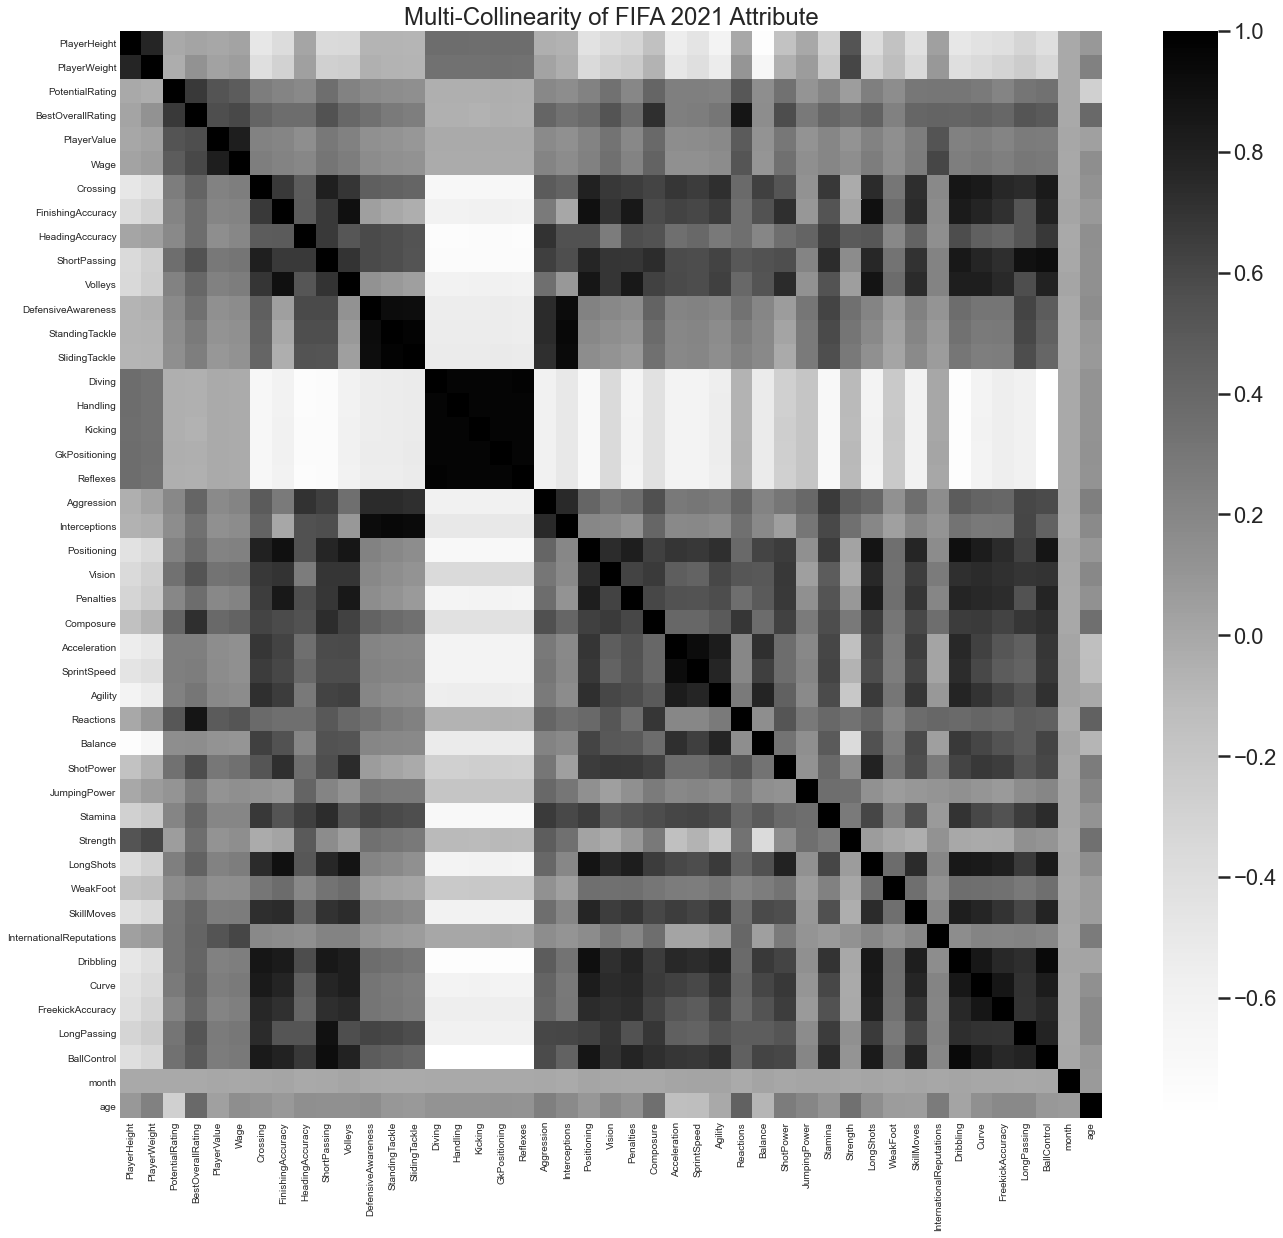

In [10]:
fig, ax = plt.subplots(figsize=(22,20))#This will set the Width and Height of our visuals
sns.set_context('poster')#This affects things like the size of the labels, lines, and other elements of the plot
corr = data_fifa.corr()#Extent Of Correlation in our Dataset
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='Greys')#Heatmap Declaration & visualization
ax.set_title('Multi-Collinearity of FIFA 2021 Attribute')#Title for Our Graph
plt.savefig('heatmap.png')

<a id ='21' ></a>
<h1 style = "background:lightblue;border:0">Pair Plot</h1>

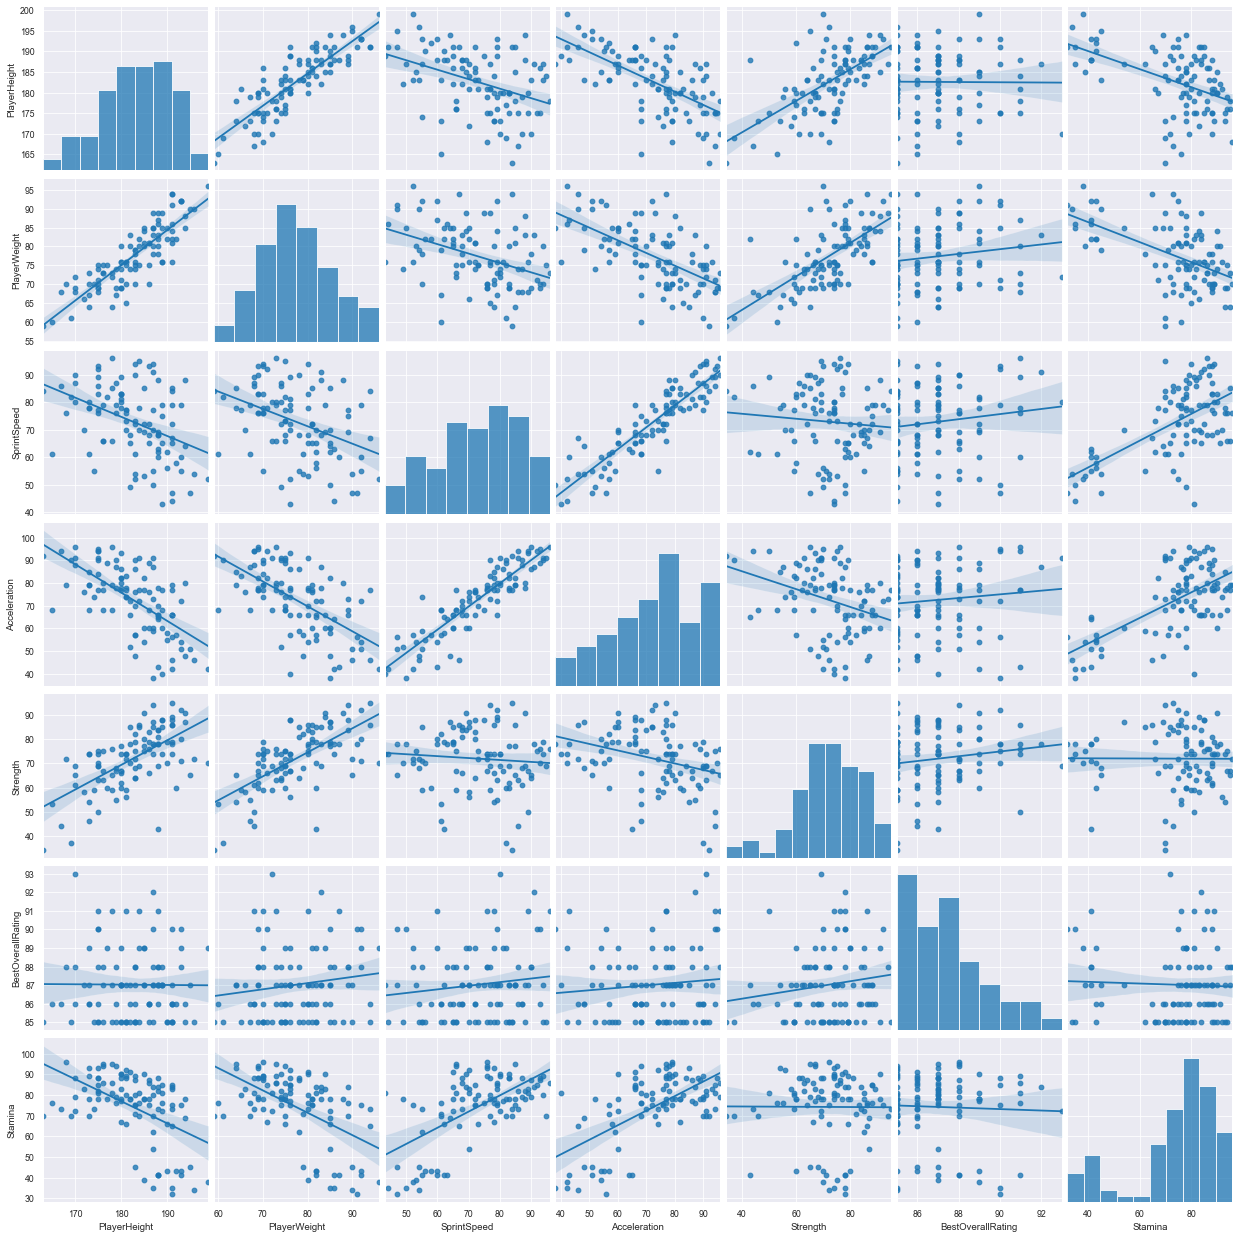

In [18]:
# relationship between player acceleration and SprintSpeed
"""
I used the ready data above to show you this graph.
data_speed(Acceleration, SprintSpeed)
data_lm = I chose 150 data to make it look clearer

the line inside the graph passes through the middle of the points.

what the line shows us ?
sprint increases when acceleration increases.
"""
sns.set_context('paper')
data_lm = data_fifa.head(100)
sns.pairplot(data_lm, vars=['PlayerHeight','PlayerWeight','SprintSpeed','Acceleration','Strength','BestOverallRating','Stamina'],kind='reg')

<a id ='22' ></a>
<h1 style = "background:lightblue;border:0">WordCloud Of Nationality</h1>

(-0.5, 1999.5, 1199.5, -0.5)

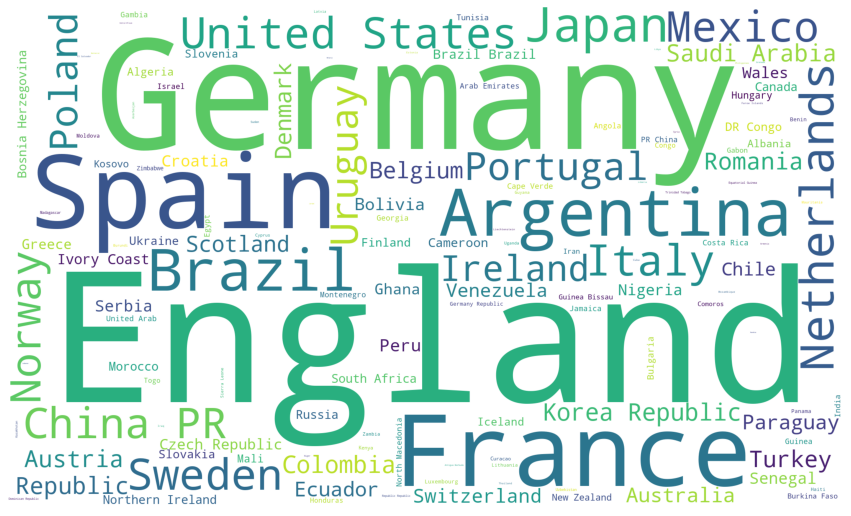

In [20]:
#WordCloud Of Nationality
d_frame = data_fifa.Nationality

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                   background_color='white',
                        width = 2000,
                        height = 1200
    ).generate(" ".join(d_frame))

plt.imshow(wordcloud)
plt.axis('off')

In [11]:
data_fifa.groupby("Nationality").PlayerName.count().sort_values(ascending=False).head(10)/100

Nationality
England          17.05
Germany          11.99
Spain            10.63
France           10.02
Argentina         9.32
Brazil            8.94
Japan             4.83
Netherlands       4.46
United States     3.81
Sweden            3.81
Name: PlayerName, dtype: float64

<a id ='23' ></a>
<h1 style = "background:lightblue;border:0">Who are the Top Players in FIFA 2021?</h1>

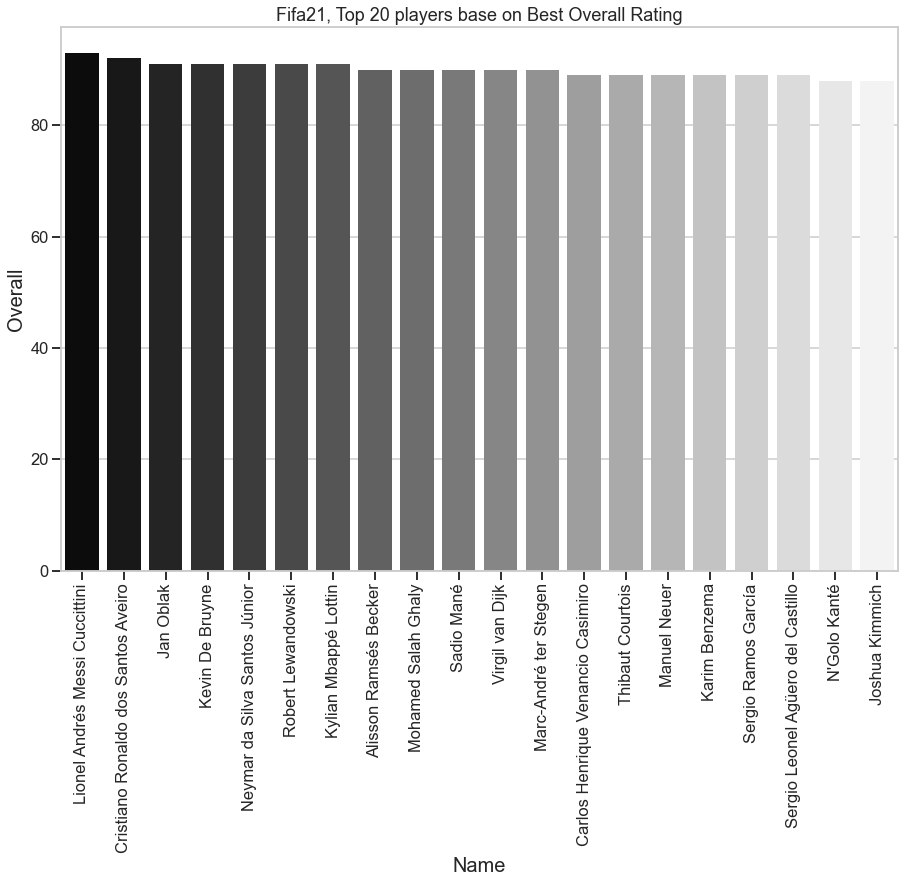

In [12]:
# problem : Top 20 players overall
# We get the names and overals from the data
Overall = data_fifa["BestOverallRating"]
footballer_name = data_fifa["PlayerName"]

# We create dataframe(Name,Overall)
data = pd.DataFrame({'PlayerName': footballer_name,'BestOverallRating':Overall})
"""
data = { example = (messi : 94) }
"""
x = data.PlayerName.head(20)  # comes in order from large to small
y = data.BestOverallRating.head(20)

# visualize
sns.set_context('talk')
plt.figure(figsize=(15,10))
"""
cubehelix_palette = This produces a colormap with linearly-decreasing (or increasing) brightness.
(sets according to the number of data)
"""
ax= sns.barplot(x=x, y=y,palette ='gray') # x = Name, y = Overall
plt.xticks(rotation= 90)
plt.xlabel('Name', size = 20) # x-axis name
plt.ylabel('Overall', size = 20 ) # y-axis name
plt.title('Fifa21, Top 20 players base on Best Overall Rating') # title
plt.show()
#plt.savefig('Top20.png')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))



<a id ='24' ></a>
<h1 style = "background:lightblue;border:0">Which foot does the footballers in fifa 21 use more?</h1>

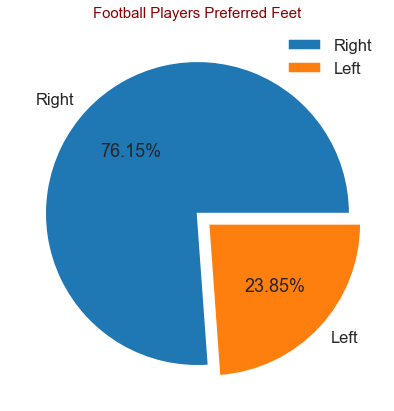

In [17]:
# Which foot does the footballers in fifa 21 use more?
preferred_foot_labels = data_fifa["PreferredFoot"].value_counts().index # (Right,Left) 
preferred_foot_values = data_fifa["PreferredFoot"].value_counts().values # (Right Values, Left Values)
explode = (0, 0.1) # used to separate a slice of cake

# Visualize
plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,explode=explode, autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'darkred',fontsize = 15)
plt.legend()
#plt.show()
plt.savefig('Piechart.jpg')

# Top 3 Footballers with the Highest Wage & Nationality of this footballers

<a id ='25' ></a>
<h1 style = "background:lightblue;border:0">Top 3 Footballers with the Highest Wage & Nationality of this footballers</h1>

Text(0.5, 0, 'Total wages')

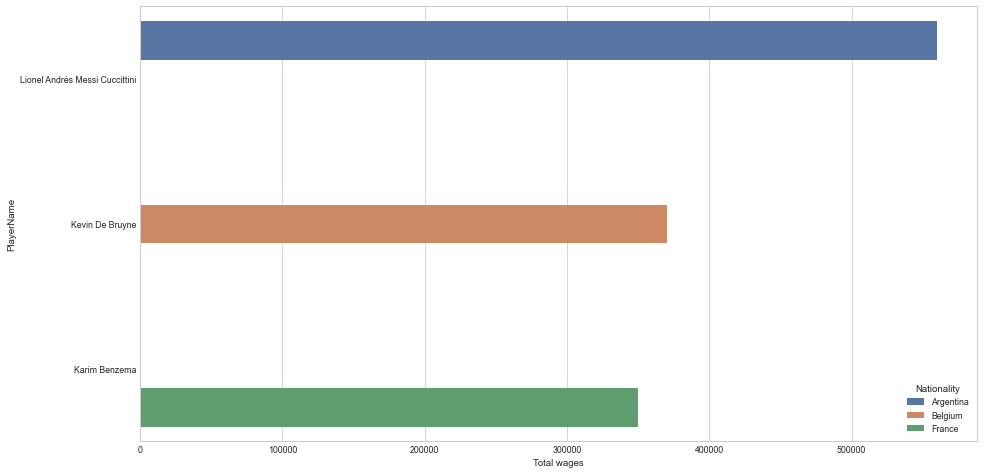

In [181]:
#Players with the highest wages
plt.figure(figsize=(15,8))
player_name = data_fifa.nlargest(3, ['Wage']).set_index('PlayerName')
sns.barplot(player_name['Wage'], player_name.index, ci = None, hue = player_name['Nationality'],palette="deep")
plt.xlabel('Total wages')

<a id ='26' ></a>
<h1 style = "background:lightblue;border:0">Most Valuable Players</h1>

# Most Valuable Player as at 2021

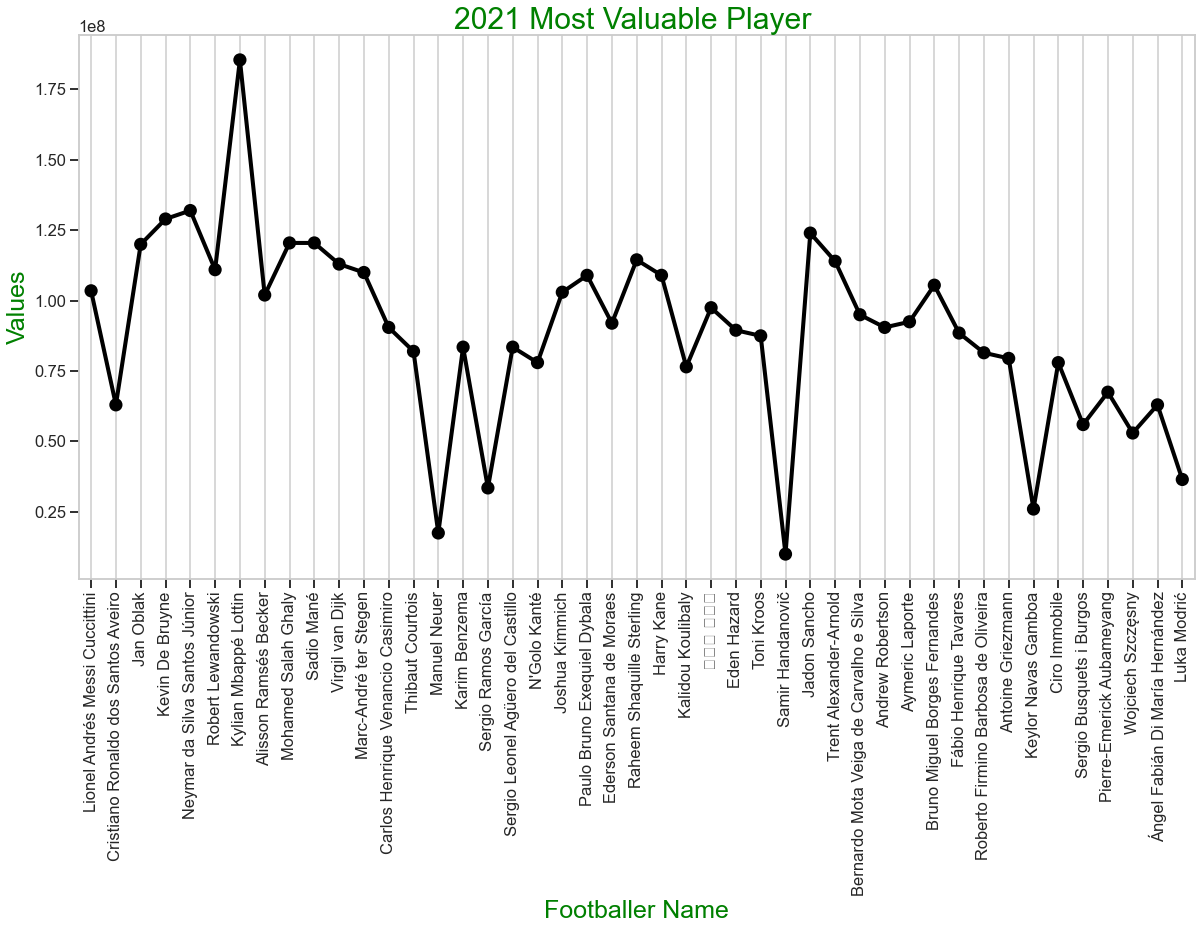

In [17]:
# Market Value of a Player ?(for 45 players)
sns.set_context('talk')
value = list(data_fifa["PlayerValue"]) 
#value = [float(each.replace('€','').replace('M','').replace('K','')) for each in value]    
name = data_fifa["PlayerName"]

data = pd.DataFrame({ 'PlayerValue' : value,'PlayerName':name})

x = data.PlayerName.head(45)
value_y = data.PlayerValue.head(45) # value_y = footballer value(30 players)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))

sns.pointplot(x=x,y=value_y,color='black',alpha=0.9) # alpha = transparency(0) or opacity(1)

plt.xticks(rotation= 90) # Position of text on the x-axis

plt.xlabel('Footballer Name',fontsize = 25,color='green') # x-axis name

plt.ylabel('Values',fontsize = 25,color='green') # y-axis name

plt.title('2021 Most Valuable Player ',fontsize = 30,color='green') # title
plt.grid()
plt.savefig('ValuablePlayer.png')

<a id ='27' ></a>
<h1 style = "background:lightblue;border:0">Age Distribution of FIFA players</h1>

# Fifa 21 Player's Age Distribution

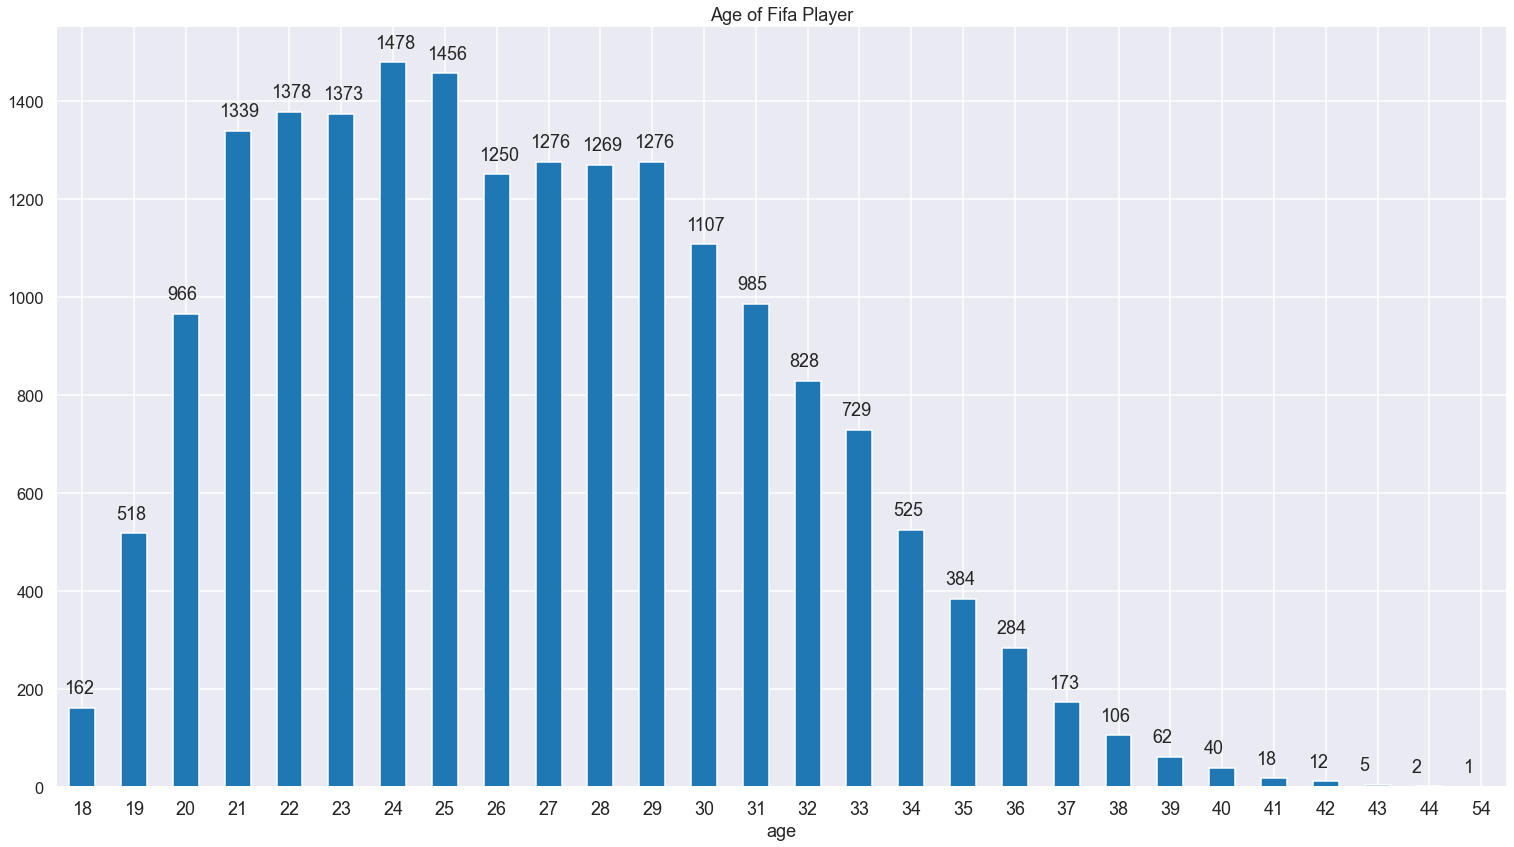

In [14]:
#Fifa 21 Player's Age
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(26,14))
ax = data_fifa.groupby('age')['PlayerName'].count().plot.bar()
plt.title('Age of Fifa Player')
plt.xticks(fontsize = 18,rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))

<a id ='28' ></a>
<h1 style = "background:lightblue;border:0"> Distribution of skill moves</h1>

# Distribution of skill moves

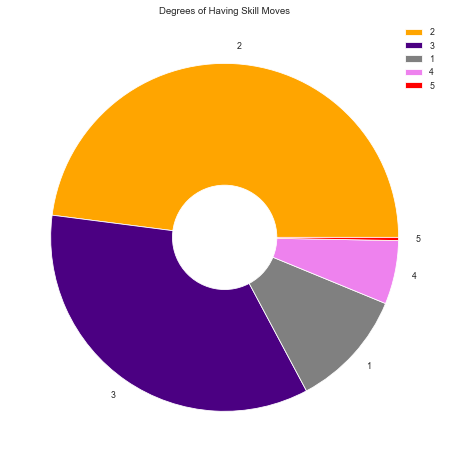

In [15]:
# distribution of skill moves
"""
1.0 = Min
2.0 = 25%
3.0 = 50%
4.0 = 75%
5.0 = Max
"""

sns.set_context('paper')
skill_moves_labels = data_fifa["SkillMoves"].value_counts().index #(1.0,2.0,3.0,4.0,5.0)
skill_moves_values = data_fifa["SkillMoves"].value_counts().values # values
colors = ['orange','indigo','grey','violet','red']

# visualize
# create a circle for the center of plot
plt.figure(figsize = (8,8))
circle = plt.Circle((0,0),0.3,color = "white") # we create a hole in the middle 
plt.pie(skill_moves_values, labels = skill_moves_labels, colors = colors)
p = plt.gcf()
p.gca().add_artist(circle) # we add the hole to the chart
plt.title("Degrees of Having Skill Moves")
plt.legend()
#plt.show()
plt.savefig('DonutChartSkillMove.png')

<a id ='29' ></a>
<h1 style = "background:lightblue;border:0"> Top 10 countries with the most footballers</h1>

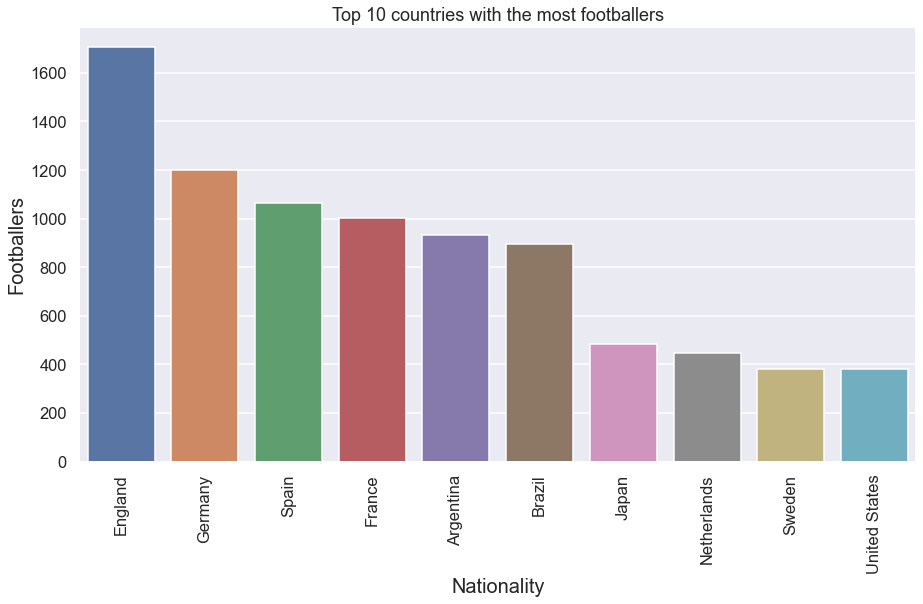

In [16]:
# problem : countries(10) with the most footballers
# Counter is a counter tool.Which country has how many players
newData = Counter(data_fifa["Nationality"])
# top 10 countries with most
most_countries = newData.most_common(10)
sns.set_context('talk')

x,y = zip(*most_countries)
x,y = list(x),list(y)

# visualize
plt.figure(figsize=(15,8))
plt.xticks(rotation= 90)#for making the text in x axis rotate to 90 degree so text wont overlap, It is good for easier understanding and 
#clarification of our graph by anyone
ax= sns.barplot(x=x, y=y, palette='deep') # x = Nationality, y = Footballers
plt.xlabel('Nationality', size = 20) # x-axis name
plt.ylabel('Footballers', size = 20 ) # y-axis name 
plt.title('Top 10 countries with the most footballers') # title
#plt.show()
plt.savefig('TopCountries.png')